# Trabajo Práctico 4 - Visión por Computadora I

## LBP

### Alumno: Domenje Carlos



### ✒️ Enunciado
Para las imágenes suministradas:


1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

### 💾 Imports de librerias necesarias 


In [11]:

import warnings
warnings.filterwarnings("ignore")
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import os

### 📟 Carga de Imagenes a utilizar

Se cargan las imagenes a utilizar

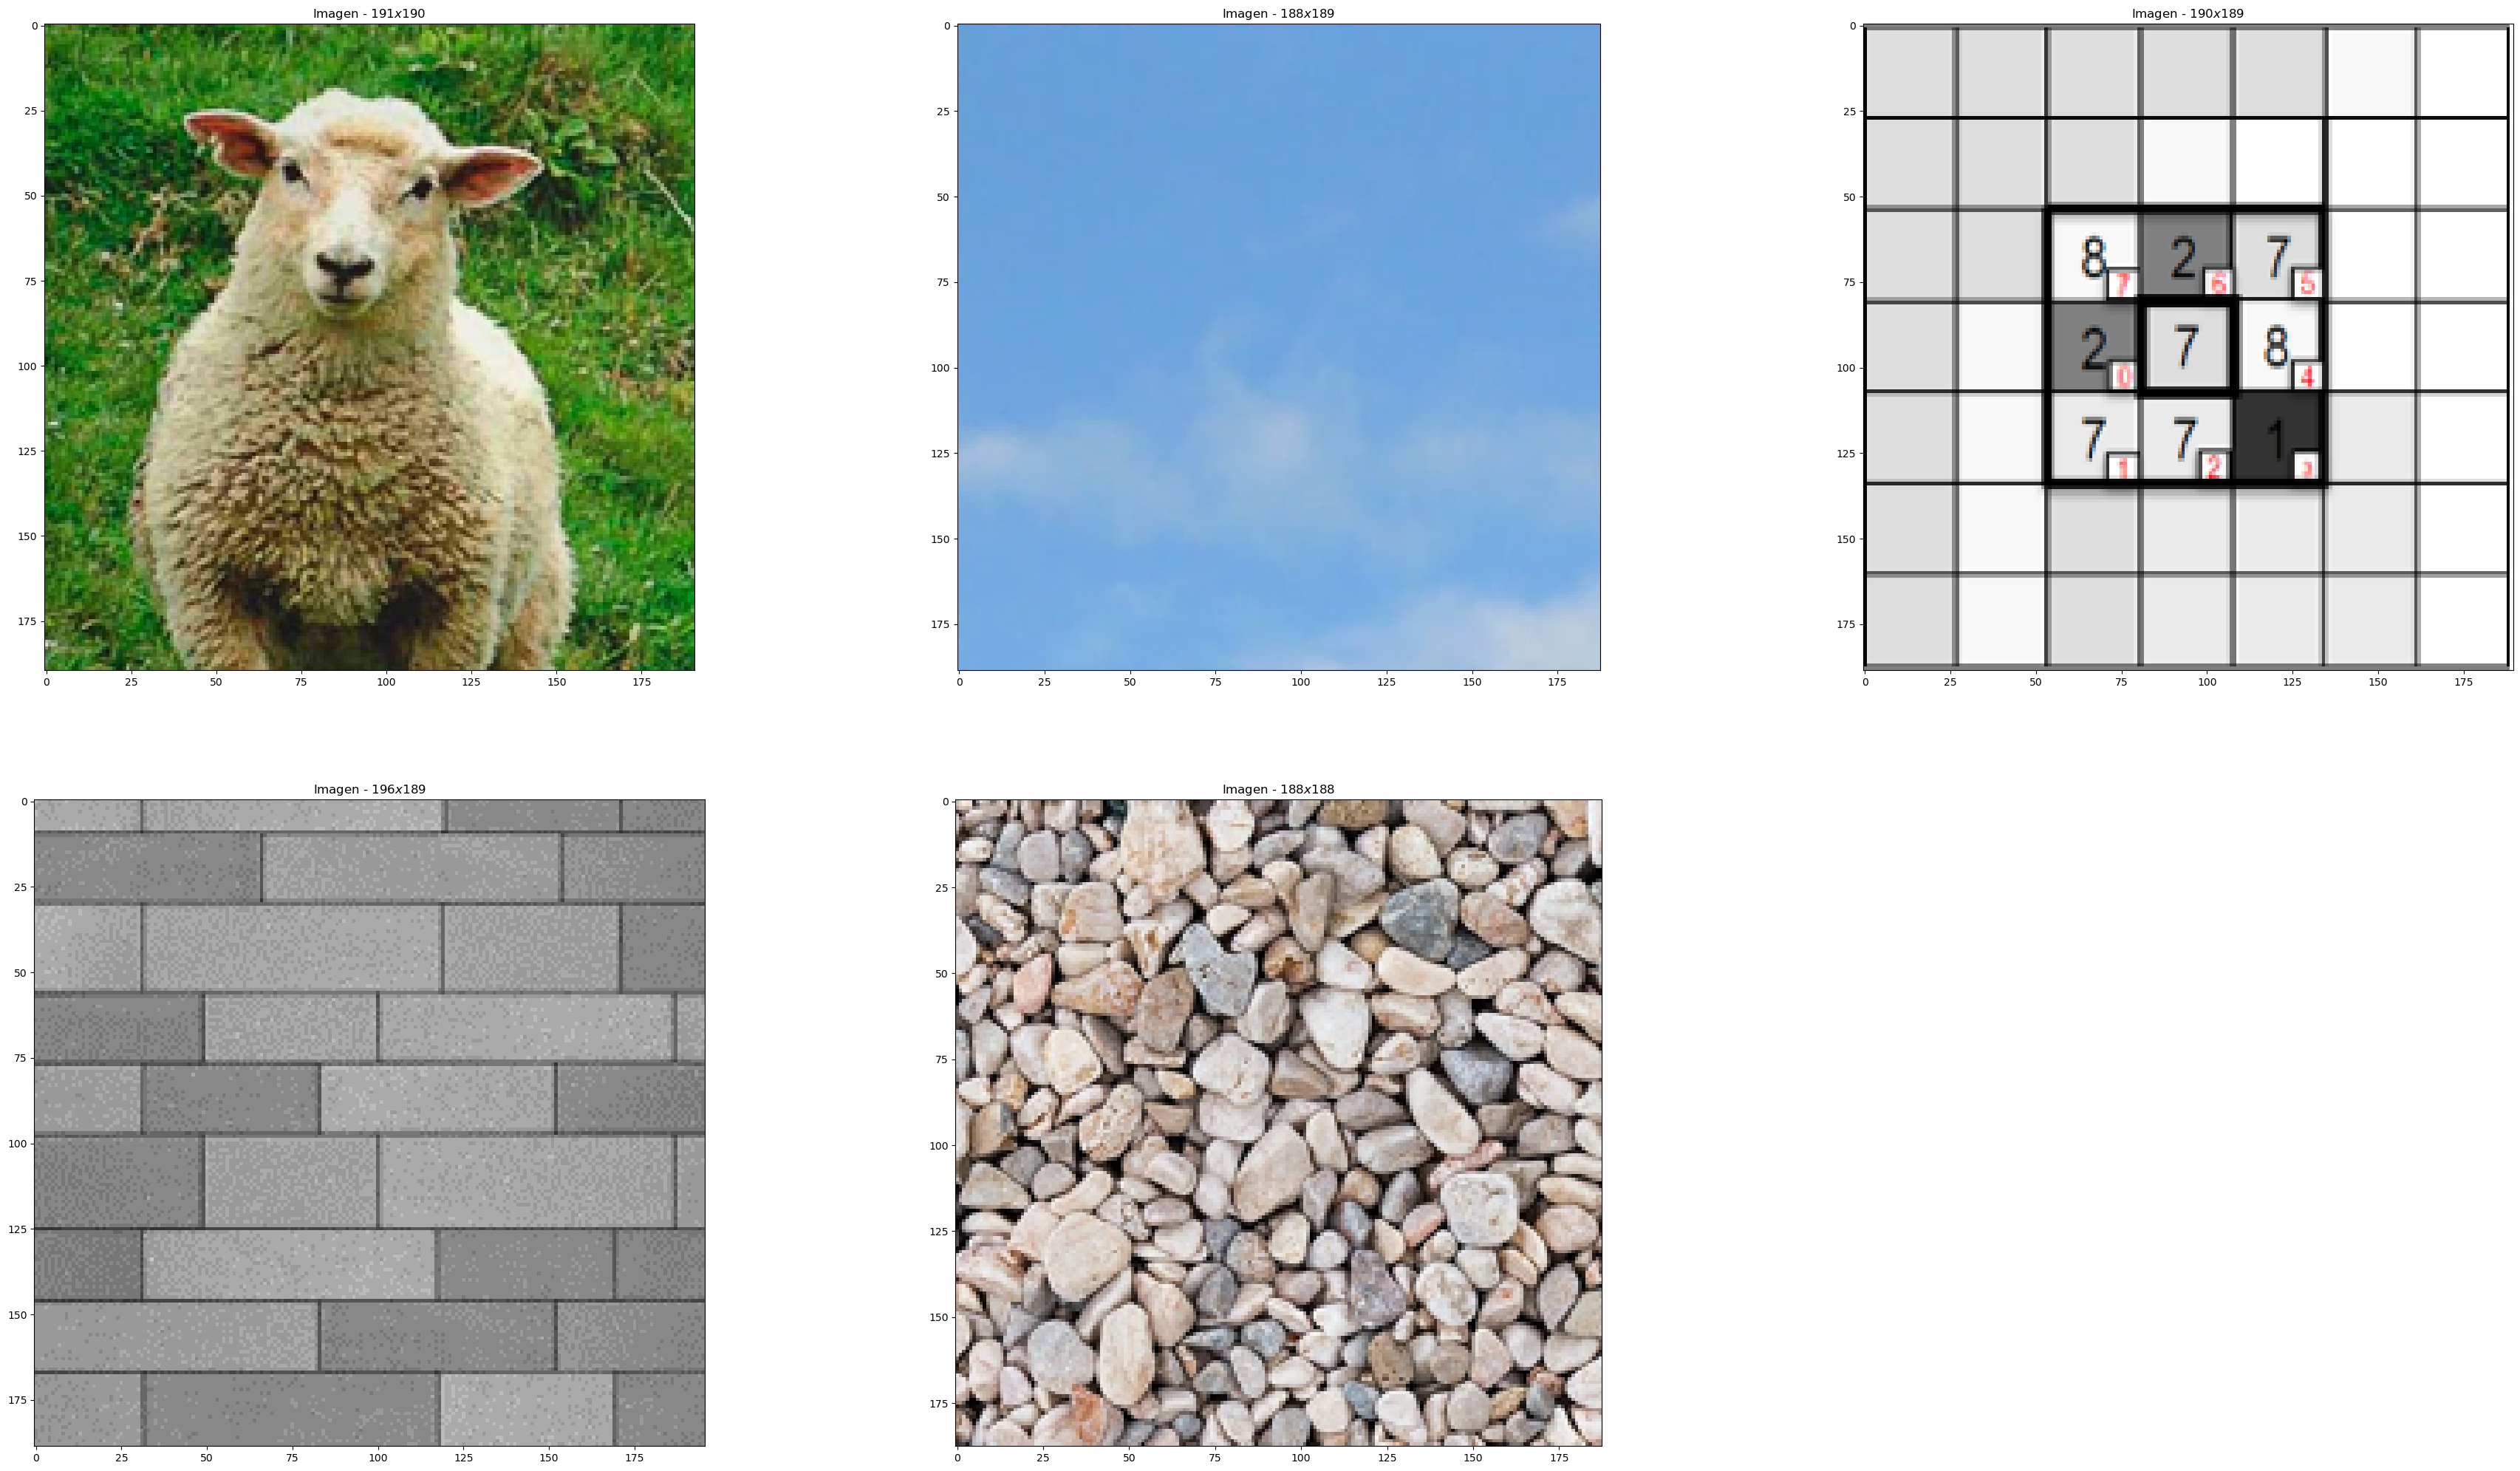

In [12]:
path = './data/'
route  = os.listdir(path)

dataset = []


for image in route:
    img = cv.imread(path+image)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    dataset.append(img)
    
Tot = len(dataset)
Cols = 3
Rows = Tot // Cols 
if Tot % Cols != 0:
    Rows += 1
Position = range(1,Tot + 1)
fig = plt.figure(1,figsize=(45,25))
for k in range(Tot):
  ax = fig.add_subplot(Rows,Cols,Position[k])
  ax.set_title(f'Imagen - ${dataset[k].shape[1]} x ${dataset[k].shape[0]}')
  ax.imshow(dataset[k])  

plt.show()

#### 🌌 Implementación LBP 
Se utiliza LBP básico (sin uniformidad, 8 vecinos)

In [13]:
def implement_LBP(image): 
    height = image.shape[0]
    width = image.shape[1]
    
    weights = np.array([1, 2, 4, 8, 16, 32, 64, 128])
    px_arr = np.zeros(8,dtype=np.uint8)
    
    out_image = np.zeros((height-2,width-2),dtype=np.uint8)
    for i in range(1,height-1):
        for j in range(1,width-1):
            center_px = image[i][j]
            px_arr = np.array([image[i-1][j-1]>=center_px,
                                    image[i-1][j]>=center_px,
                                    image[i-1][j+1]>=center_px,
                                    image[i][j+1]>=center_px,
                                    image[i+1][j+1]>=center_px,
                                    image[i+1][j]>=center_px,
                                    image[i+1][j-1]>=center_px,
                                    image[i][j-1]>=center_px
                                    ])
            out_image[i-1][j-1] = np.sum(px_arr*weights)
    
    return out_image

#### 💻 Aplicando LBP al dataset.

Se hace uso de la función previamente generada para aplicarla en cada una de las imágenes y ademas se imprime su histograma para observar y evaluar los cambios.


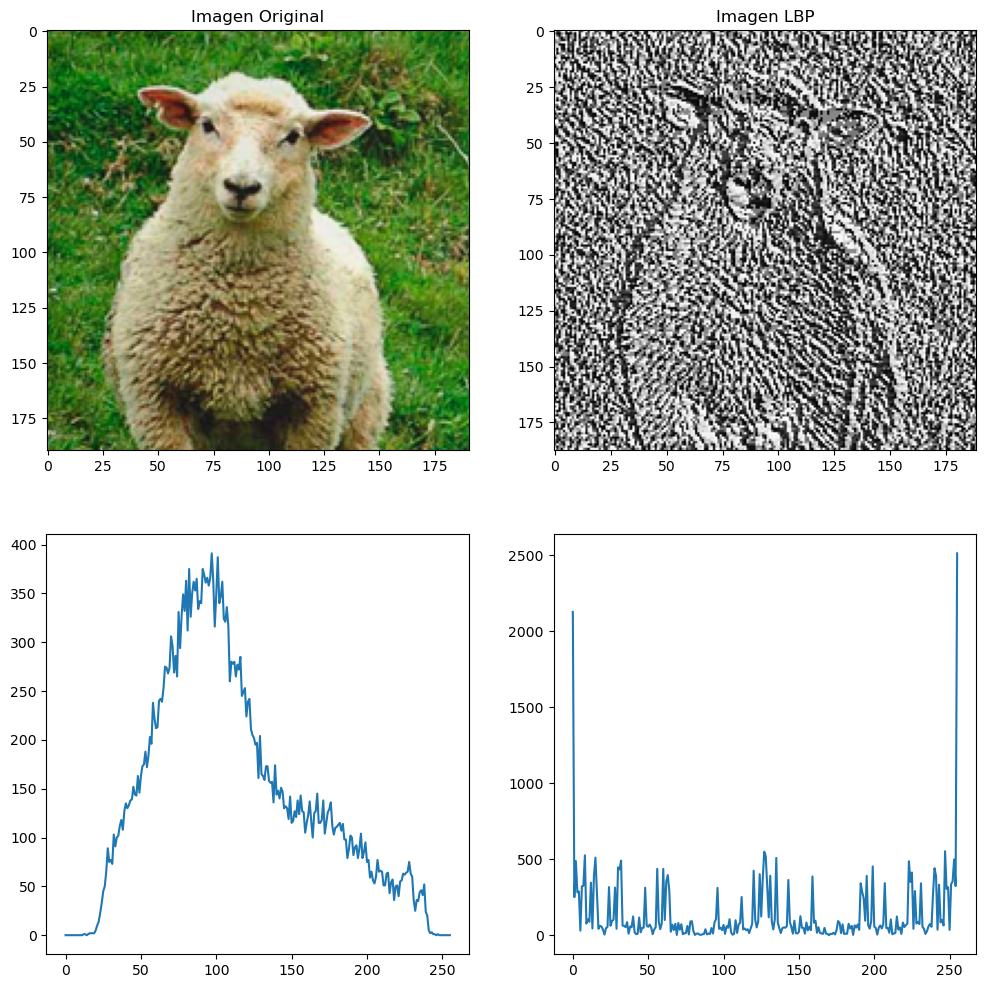

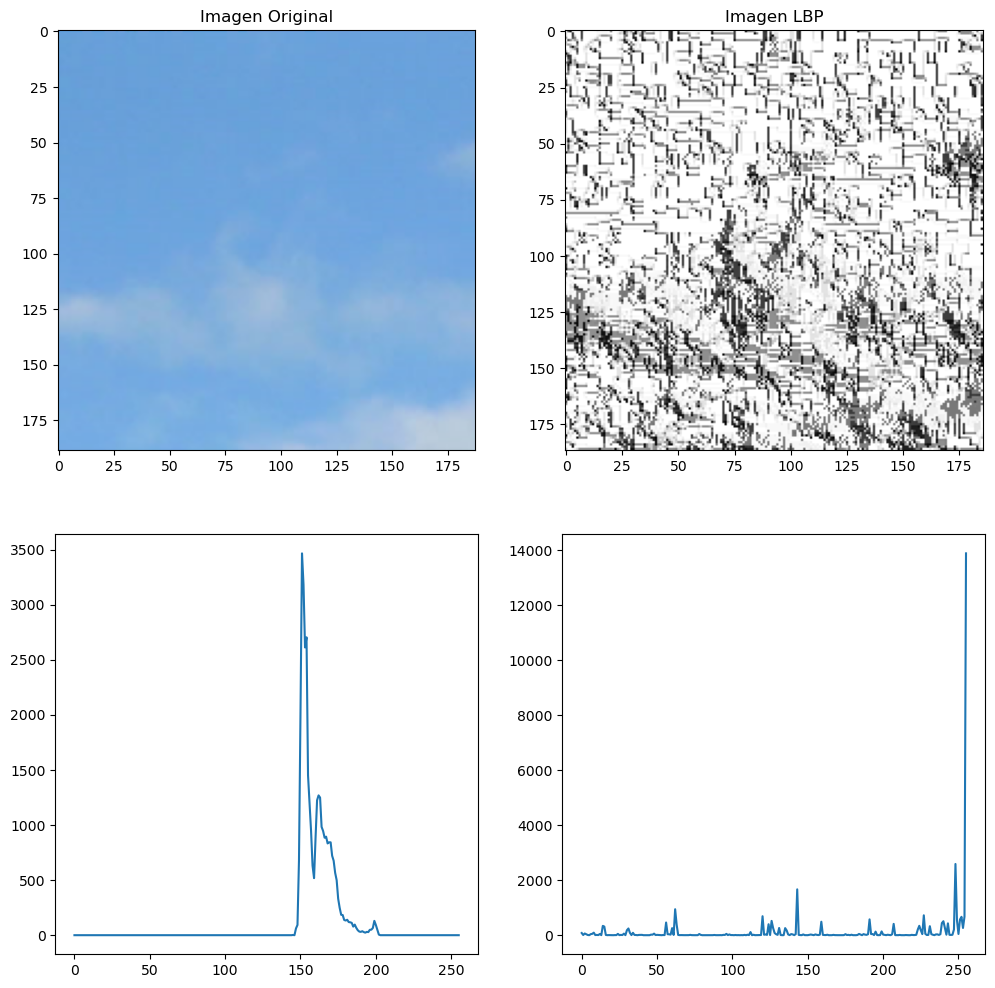

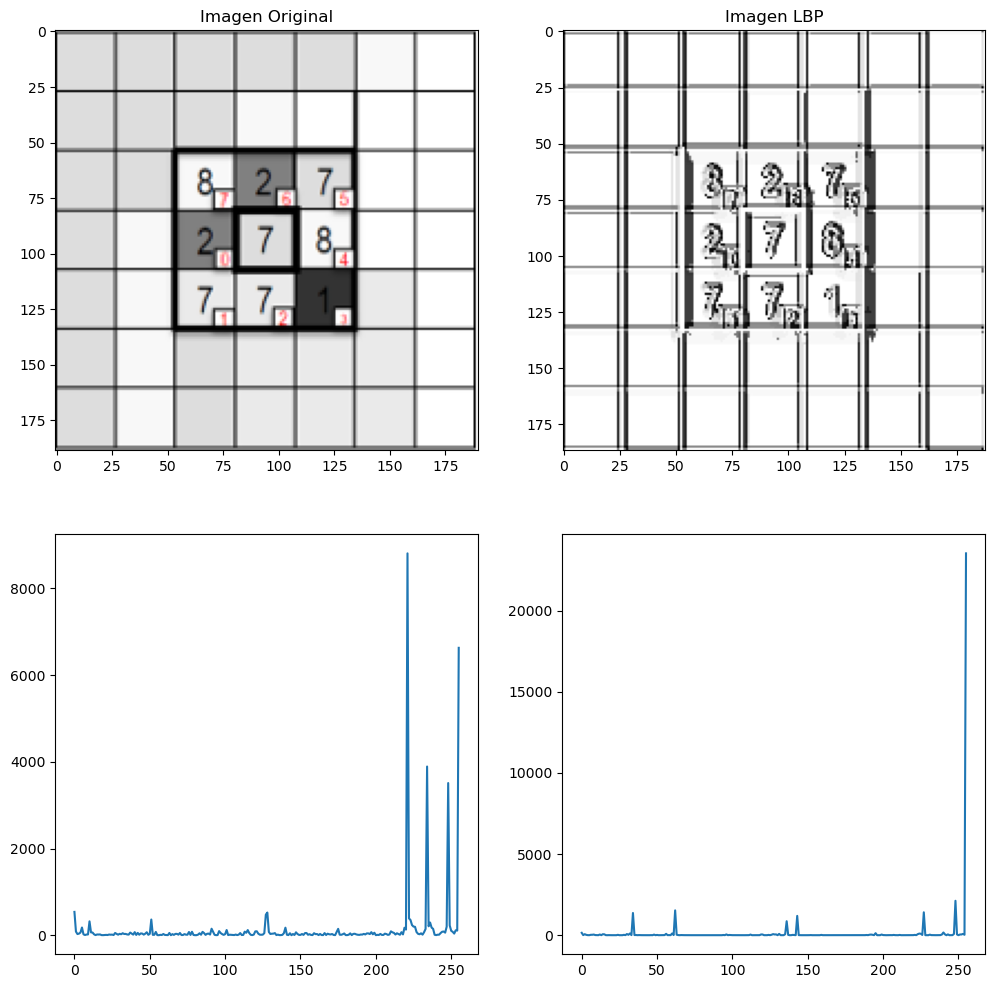

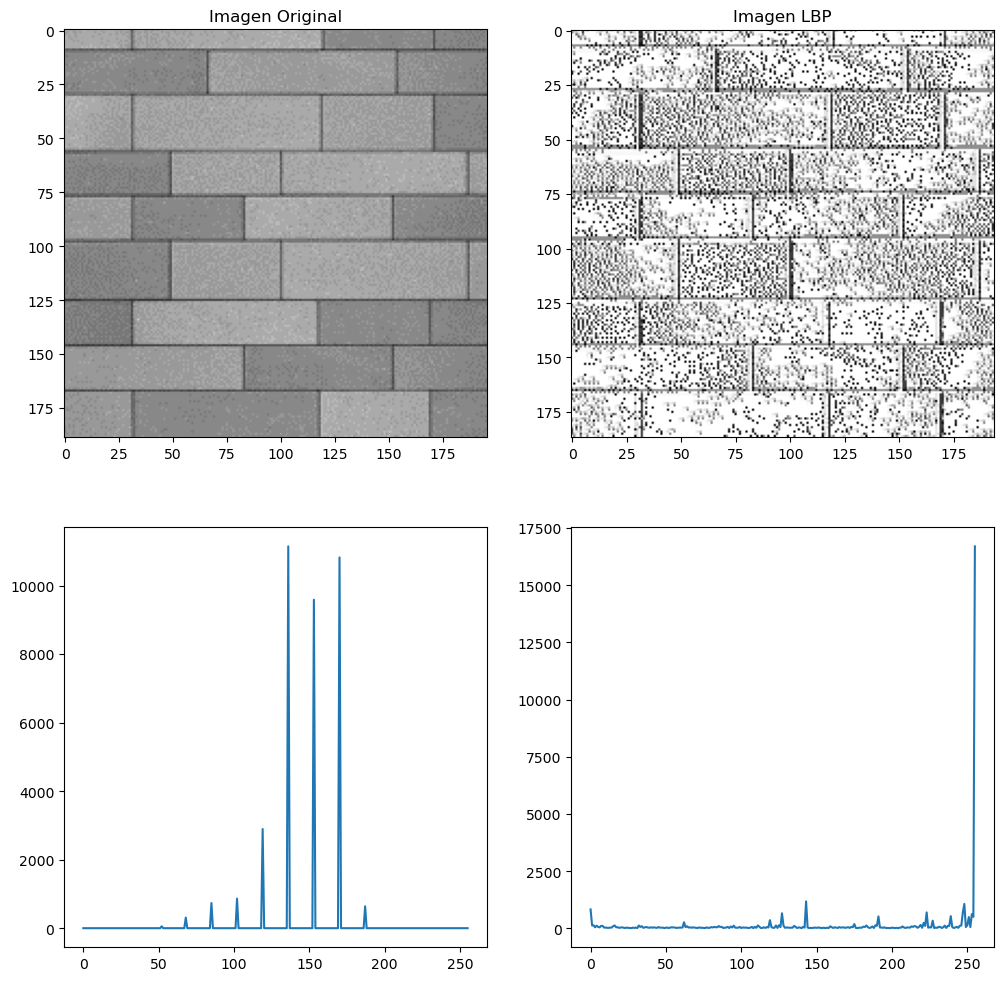

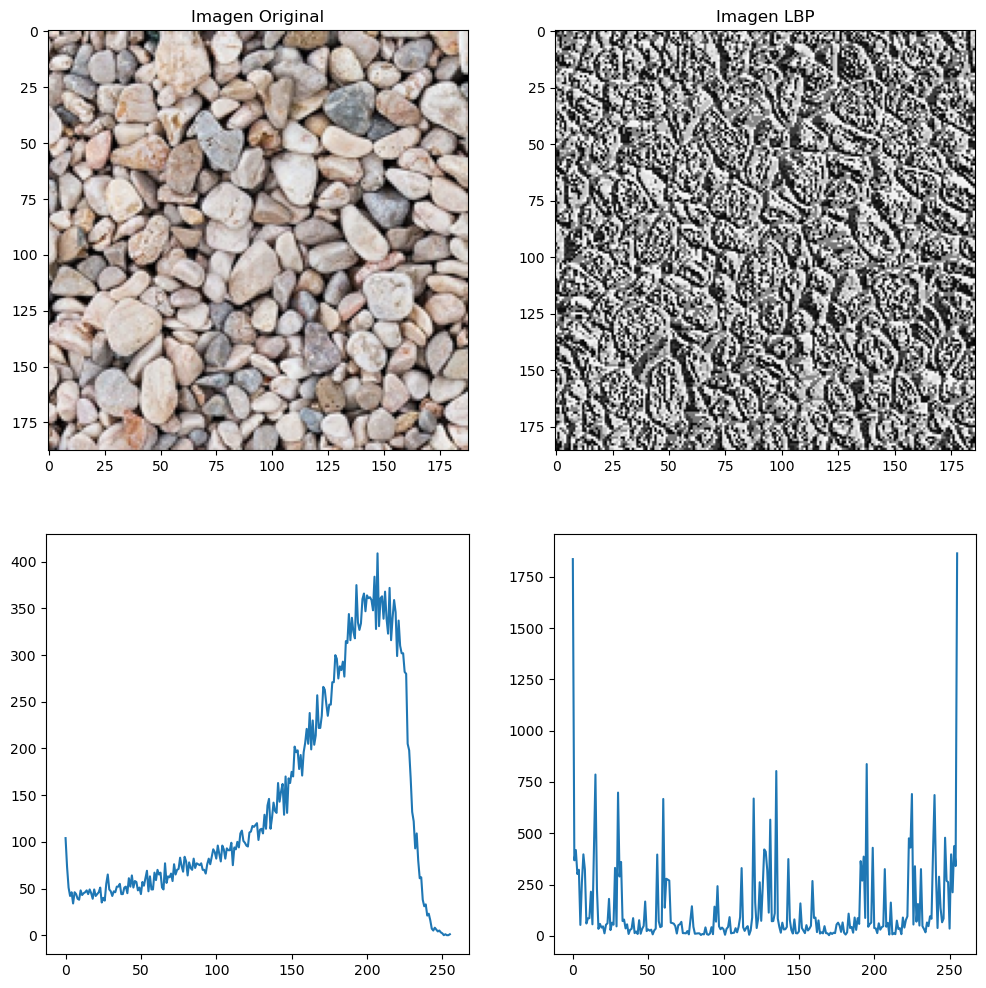

In [14]:
path = './data/'
images  = os.listdir(path)

for image in images:
    # Leemos la imagen
    img = cv.imread(path+image)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    # Pasamos a escala de grises y luego aplicamos LBP
    img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_lbp = implement_LBP(img_gray)
    # Tomamos el histograma de la imagen original
    hist,bins = np.histogram(img_gray.ravel(),256,[0,256])
    # Obtenemos el histograma de la imagen con LBP aplicado.
    hist_lbp,bins1_lbp = np.histogram(img_lbp.ravel(),256,[0,256])
    
    # Plot de histogramas
    fig = plt.figure()
    fig.set_figheight(12)
    fig.set_figwidth(12)
    # Imagen Original
    ax1=plt.subplot(221)
    ax1.imshow(img)
    ax1.set_title('Imagen Original')
    # Histograma
    ax3=plt.subplot(223)
    ax3.plot(hist)

    # Imagen con LBP
    ax2=plt.subplot(222)
    ax2.imshow(img_lbp, cmap='gray', vmin=0, vmax=255)
    ax2.set_title('Imagen LBP')
    # Histograma LBP
    ax4=plt.subplot(224)
    ax4.plot(hist_lbp)

    plt.show()
 

### 📊 Conclusión

Se realizó la función de LBP para luego poder aplicarla al dataset de imagenes provistas en el ejercicio. 

Analizando el histograma de las imagenes con el LBP aplicado, vemos que la distribución se hace a través de todos los bins y no se centra en un lugar puntual de la imagen. Ademas, hay que saber que se gerena un pico en los ultimos bins del histograma.

Otro analisis que se puede inferir observando los histogramas, es que a diferentes imagenes se generan histogramas bastante similares, solamente se notan diferencias en sus magnitudes, no asi en la distribucion, por lo que si la imagen estaria normalizada podriamos tener iguales histogramas para diferentes imagenes, y esto representaria un problema si queremos hacer detección.

La técnica de subdivisión de ventanas puede ayudarnos a solucionar este tipo de problemas. 